In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [283]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [284]:
df.shape 

(918, 12)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [286]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [287]:
# Categorical columns 

df.describe(exclude = 'number')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

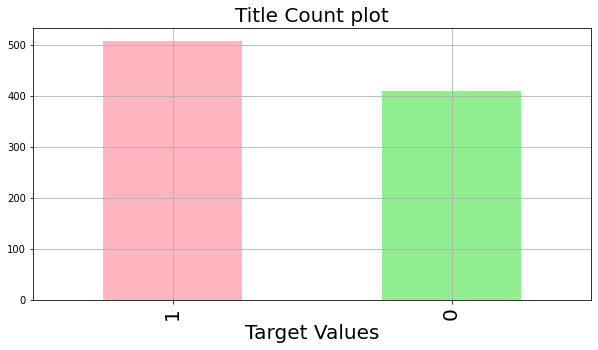

In [288]:
df["HeartDisease"].value_counts().plot(kind="bar", color=['lightpink','lightgreen'],figsize=(10,5), grid=True)
plt.title('Title Count plot',fontsize=20)
plt.xlabel('Target Values',fontsize=20)
plt.xticks(fontsize=20)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

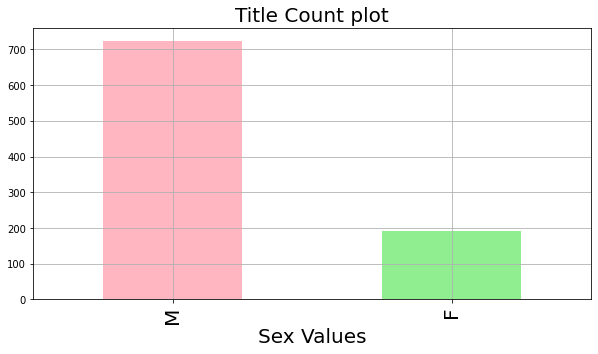

In [289]:
df["Sex"].value_counts().plot(kind="bar", color=['lightpink','lightgreen'],figsize=(10,5), grid=True)
plt.title('Title Count plot',fontsize=20)
plt.xlabel('Sex Values',fontsize=20)
plt.xticks(fontsize=20)

In [290]:
#checking general division of data based on unique target values
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


Text(0.5, 0, 'Age')

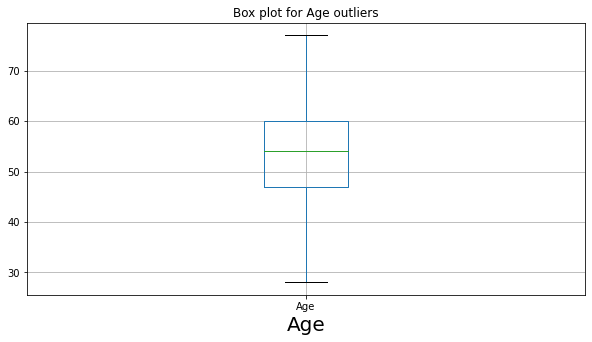

In [291]:
plt.figure(figsize=(10,5))
df.boxplot(column=['Age'], grid=True).set_title('Box plot for Age outliers')
plt.xlabel('Age',fontsize=20)

<Figure size 1080x720 with 0 Axes>

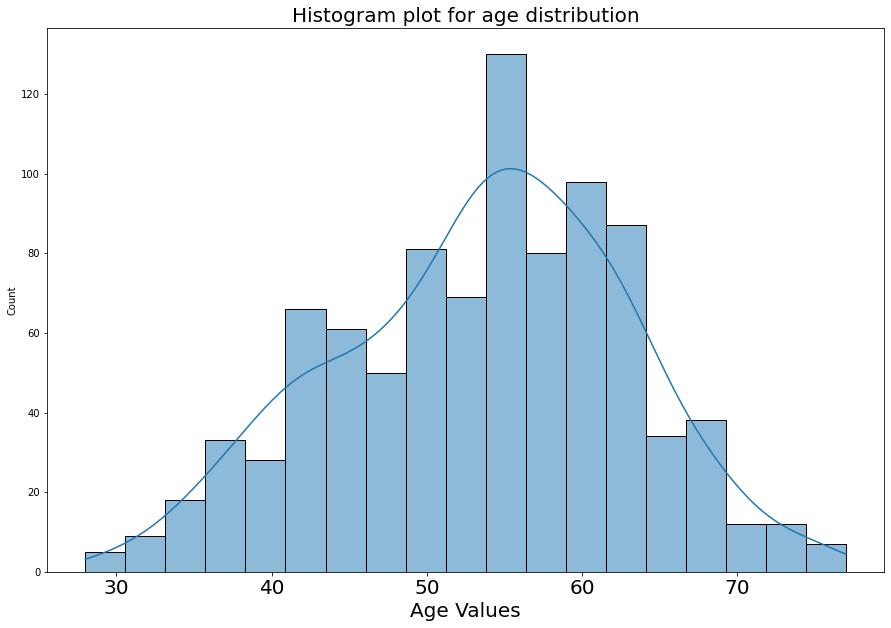

<Figure size 1080x720 with 0 Axes>

In [292]:
# Age distribution in data using histogram


plt.figure(figsize=(15,10))
sns.histplot(df.Age,kde=True);

plt.title('Histogram plot for age distribution',fontsize=20)
plt.xlabel('Age Values',fontsize=20)
plt.xticks(fontsize=20)
plt.figure(figsize=(15,10))

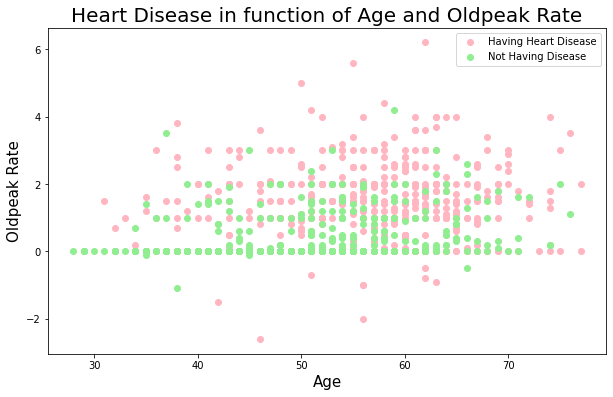

In [293]:

plt.figure(figsize=(10, 6))
plt.scatter(df.Age[df.HeartDisease==1],
            df.Oldpeak[df.HeartDisease==1],
            c="lightpink")

plt.scatter(df.Age[df.HeartDisease==0],
            df.Oldpeak[df.HeartDisease==0],
            c="lightgreen")

# Add some helpful info
plt.title("Heart Disease in function of Age and Oldpeak Rate",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Oldpeak Rate",fontsize=15)
plt.legend(["Having Heart Disease", "Not Having Disease"]);

In [294]:
# Checking missing values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [295]:
#duplicate rows in each dataset
sum(df.duplicated())

0

(7.0, 0.0)

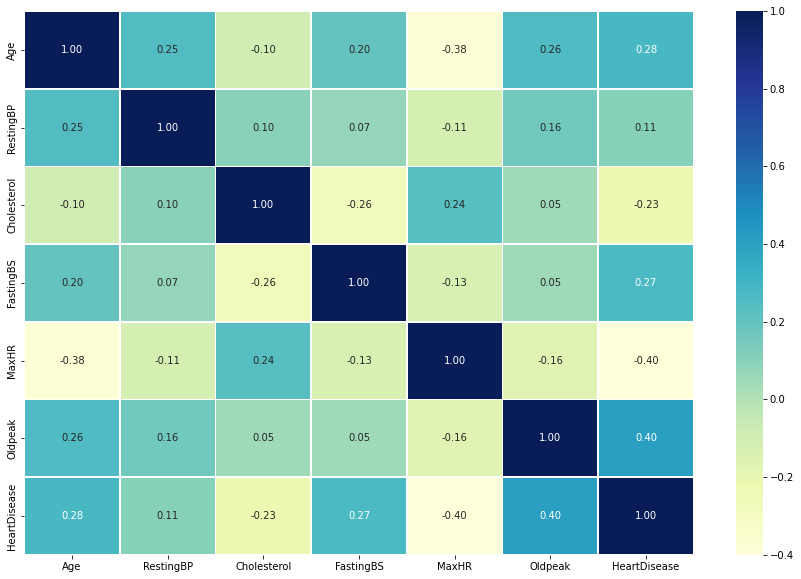

In [296]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

In [297]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [298]:

X = df.iloc[:, 0:-2]

# The target will be the last column --> whether they lost the client or not
y = df.iloc[:, -1]


In [299]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak
0,40,M,ATA,140,289,0,Normal,172,N,0.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0
2,37,M,ATA,130,283,0,ST,98,N,0.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5
4,54,M,NAP,150,195,0,Normal,122,N,0.0
...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2
914,68,M,ASY,144,193,1,Normal,141,N,3.4
915,57,M,ASY,130,131,0,Normal,115,Y,1.2
916,57,F,ATA,130,236,0,LVH,174,N,0.0


In [300]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [301]:

le = LabelEncoder()

X.iloc[:,1] = le.fit_transform(X.iloc[:,1])

In [302]:
# sex is now 0 and 1
#1 -> M , 0 -> F

X.iloc[:,1].unique()

array([1, 0])

In [303]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak
0,40,1,ATA,140,289,0,Normal,172,N,0.0
1,49,0,NAP,160,180,0,Normal,156,N,1.0
2,37,1,ATA,130,283,0,ST,98,N,0.0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5
4,54,1,NAP,150,195,0,Normal,122,N,0.0


In [304]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [305]:
# 0 -> No
#1 -> yes 
lea = LabelEncoder()

X.iloc[:,8] = lea.fit_transform(X.iloc[:,8])


In [306]:

X.iloc[:,8].unique()

array([0, 1])

In [307]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak
0,40,1,ATA,140,289,0,Normal,172,0,0.0
1,49,0,NAP,160,180,0,Normal,156,0,1.0
2,37,1,ATA,130,283,0,ST,98,0,0.0
3,48,0,ASY,138,214,0,Normal,108,1,1.5
4,54,1,NAP,150,195,0,Normal,122,0,0.0


In [308]:
# ATA -> 0,1,0,0
# NAP -> 0,0,1,0
# ASY -> 1,0,0,0
#TA -> 0,0,0,1
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [309]:
df['ChestPainType'].unique()



array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [310]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,40,1,140,289,0,Normal,172,0,0.0
1,0.0,0.0,1.0,0.0,49,0,160,180,0,Normal,156,0,1.0
2,0.0,1.0,0.0,0.0,37,1,130,283,0,ST,98,0,0.0
3,1.0,0.0,0.0,0.0,48,0,138,214,0,Normal,108,1,1.5
4,0.0,0.0,1.0,0.0,54,1,150,195,0,Normal,122,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,0.0,0.0,1.0,45,1,110,264,0,Normal,132,0,1.2
914,1.0,0.0,0.0,0.0,68,1,144,193,1,Normal,141,0,3.4
915,1.0,0.0,0.0,0.0,57,1,130,131,0,Normal,115,1,1.2
916,0.0,1.0,0.0,0.0,57,0,130,236,0,LVH,174,0,0.0


In [311]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [312]:
# 0,1,0 - > Normal
# 0 ,0,1 -> ST 
#1,0,0 ->LVH
cta = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9])], remainder='passthrough')

X = np.array(cta.fit_transform(X))

In [313]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,40,1,140,289,0,172,0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,0,160,180,0,156,0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,37,1,130,283,0,98,0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48,0,138,214,0,108,1,1.5
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54,1,150,195,0,122,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,0.0,1.0,45,1,110,264,0,132,0,1.2
914,0.0,1.0,0.0,1.0,0.0,0.0,0.0,68,1,144,193,1,141,0,3.4
915,0.0,1.0,0.0,1.0,0.0,0.0,0.0,57,1,130,131,0,115,1,1.2
916,1.0,0.0,0.0,0.0,1.0,0.0,0.0,57,0,130,236,0,174,0,0.0


In [314]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [315]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [316]:
ann = tf.keras.models.Sequential()

In [317]:

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [318]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [319]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [320]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [321]:

ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 0.6623 - accuracy: 0.6131
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.6635
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.6853
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.6989
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7153
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7384
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7643
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7820
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7943
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8038
Epoch 11/

In [322]:
print(ann.predict(sc.transform([[0, 1, 0, 0, 0, 1, 0,49,0, 160, 180, 0, 156, 0,1]])))
print(ann.predict(sc.transform([[0, 1, 0, 0, 0, 1, 0,49,0, 160, 180, 0, 156, 0,1]]))>0.7)

1/1 [==============================] - 0s 55ms/step
[[0.07244432]]
1/1 [==============================] - 0s 18ms/step
[[False]]


In [323]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.7)


6/6 [==============================] - 0s 2ms/step


In [324]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77        77
           1       0.88      0.74      0.80       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



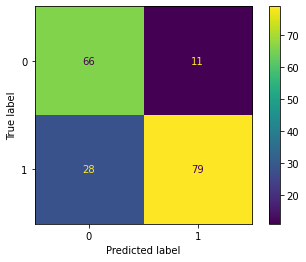

In [325]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

# second version

In [326]:

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [328]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [329]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [330]:

ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.6978 - accuracy: 0.4537
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4537
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4537
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.4537
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.4537
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.4537
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.4537
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.4537
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6771
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.8460
Epoch 11/

In [333]:
#print(ann.predict(sc.transform([[0, 1, 0, 0, 0, 1, 0,49,0, 160, 180, 0, 156, 0,1]])))
print(ann.predict(sc.transform([[0, 1, 0, 0, 0, 1, 0,49,0, 160, 180, 0, 156, 0,1]])) > 0.6)

1/1 [==============================] - 0s 27ms/step
[[False]]


In [334]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.6)


6/6 [==============================] - 0s 3ms/step


In [335]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        77
           1       0.83      0.80      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



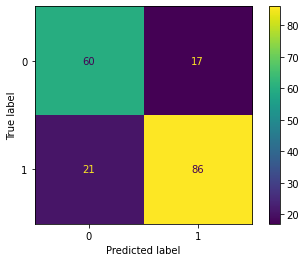

In [336]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

**third version**

In [337]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))


In [338]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [339]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [340]:

ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.7288 - accuracy: 0.4537
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7197 - accuracy: 0.4537
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.1594
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.1294
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5463
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5463
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5463
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5463
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5463
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5463
Epoch 11/

In [341]:
#print(ann.predict(sc.transform([[0, 1, 0, 0, 0, 1, 0,49,0, 160, 180, 0, 156, 0,1]])))
print(ann.predict(sc.transform([[0, 1, 0, 0, 0, 1, 0,49,0, 160, 180, 0, 156, 0,1]]))>0.72)

1/1 [==============================] - 0s 291ms/step
[[False]]


In [342]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.72)


6/6 [==============================] - 0s 2ms/step


In [343]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        77
           1       0.83      0.81      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



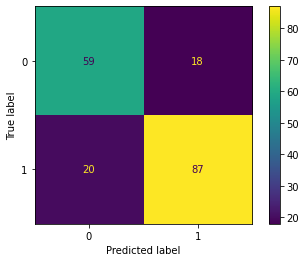

In [344]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()